In [1]:
# external import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# load my publication style
plt.style.use("periodic_table.mplstyle")

In [2]:
# Load the training and test set lists
with open("IPA_results/train_set.txt") as file:
    train_set = [line.rstrip() for line in file]
with open("IPA_results/test_set.txt") as file:
    test_set = [line.rstrip() for line in file]
data_df = pd.read_pickle("database/data_300_rpa.pckl")

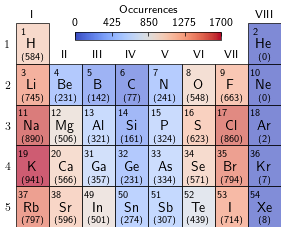

In [3]:
# count how often each element occurs in the training set
train_elems = np.array([])
for train in train_set:
    if train in data_df["mat_id"].values:
        train_elems = np.append(
            train_elems, data_df[data_df["mat_id"] == train].elements.values[0])
elem_counts = np.unique(train_elems, return_counts=True)
max_count = np.max(elem_counts[1])
counts = {}
for key, value in zip(*elem_counts):
    counts[key] = [value, value / max_count]

# define the periodic table data
elements = [
    {"Symbol": "H",  "Name": "Hydrogen",
        "AtomicNumber": 1,  "Group": 1,  "Period": 1},
    {"Symbol": "He", "Name": "Helium",
        "AtomicNumber": 2,  "Group": 8, "Period": 1},
    {"Symbol": "Li", "Name": "Lithium",
        "AtomicNumber": 3,  "Group": 1,  "Period": 2},
    {"Symbol": "Be", "Name": "Beryllium",
        "AtomicNumber": 4,  "Group": 2,  "Period": 2},
    {"Symbol": "B",  "Name": "Boron",
        "AtomicNumber": 5,  "Group": 3, "Period": 2},
    {"Symbol": "C",  "Name": "Carbon",
        "AtomicNumber": 6,  "Group": 4, "Period": 2},
    {"Symbol": "N",  "Name": "Nitrogen",
        "AtomicNumber": 7,  "Group": 5, "Period": 2},
    {"Symbol": "O",  "Name": "Oxygen",
        "AtomicNumber": 8,  "Group": 6, "Period": 2},
    {"Symbol": "F",  "Name": "Fluorine",
        "AtomicNumber": 9,  "Group": 7, "Period": 2},
    {"Symbol": "Ne", "Name": "Neon",
        "AtomicNumber": 10, "Group": 8, "Period": 2},
    {"Symbol": "Na", "Name": "Sodium",
        "AtomicNumber": 11, "Group": 1,  "Period": 3},
    {"Symbol": "Mg", "Name": "Magnesium",
        "AtomicNumber": 12, "Group": 2,  "Period": 3},
    {"Symbol": "Al", "Name": "Aluminum",
        "AtomicNumber": 13, "Group": 3, "Period": 3},
    {"Symbol": "Si", "Name": "Silicon",
        "AtomicNumber": 14, "Group": 4, "Period": 3},
    {"Symbol": "P",  "Name": "Phosphorus",
        "AtomicNumber": 15, "Group": 5, "Period": 3},
    {"Symbol": "S",  "Name": "Sulfur",
        "AtomicNumber": 16, "Group": 6, "Period": 3},
    {"Symbol": "Cl", "Name": "Chlorine",
        "AtomicNumber": 17, "Group": 7, "Period": 3},
    {"Symbol": "Ar", "Name": "Argon",
        "AtomicNumber": 18, "Group": 8, "Period": 3},
    {"Symbol": "K",  "Name": "Potassium",
        "AtomicNumber": 19, "Group": 1,  "Period": 4},
    {"Symbol": "Ca", "Name": "Calcium",
        "AtomicNumber": 20, "Group": 2,  "Period": 4},
    {"Symbol": "Ga", "Name": "Gallium",
        "AtomicNumber": 31, "Group": 3, "Period": 4},
    {"Symbol": "Ge", "Name": "Germanium",
        "AtomicNumber": 32, "Group": 4, "Period": 4},
    {"Symbol": "As", "Name": "Arsenic",
        "AtomicNumber": 33, "Group": 5, "Period": 4},
    {"Symbol": "Se", "Name": "Selenium",
        "AtomicNumber": 34, "Group": 6, "Period": 4},
    {"Symbol": "Br", "Name": "Bromine",
        "AtomicNumber": 35, "Group": 7, "Period": 4},
    {"Symbol": "Kr", "Name": "Krypton",
        "AtomicNumber": 36, "Group": 8, "Period": 4},
    {"Symbol": "Rb", "Name": "Rubidium",
        "AtomicNumber": 37, "Group": 1,  "Period": 5},
    {"Symbol": "Sr", "Name": "Strontium",
        "AtomicNumber": 38, "Group": 2,  "Period": 5},
    {"Symbol": "In", "Name": "Indium",
        "AtomicNumber": 49, "Group": 3, "Period": 5},
    {"Symbol": "Sn", "Name": "Tin",
        "AtomicNumber": 50, "Group": 4, "Period": 5},
    {"Symbol": "Sb", "Name": "Antimony",
        "AtomicNumber": 51, "Group": 5, "Period": 5},
    {"Symbol": "Te", "Name": "Tellurium",
        "AtomicNumber": 52, "Group": 6, "Period": 5},
    {"Symbol": "I",  "Name": "Iodine",
        "AtomicNumber": 53, "Group": 7, "Period": 5},
    {"Symbol": "Xe", "Name": "Xenon",
        "AtomicNumber": 54, "Group": 8, "Period": 5},
]
df = pd.DataFrame(elements)

# create a grid for the periodic table
fig, ax = plt.subplots(figsize=(3, 2.5))

# plot each element
cmap = plt.get_cmap("coolwarm")
for _, element in df.iterrows():
    # adjust for visual positioning in the grid
    xpos = element["Group"]
    ypos = element["Period"]

    # add the element box
    try:
        color = cmap(counts[element["Symbol"]][1], alpha=0.65)
    except:
        color = cmap(0, alpha=0.65)
    ax.add_patch(plt.Rectangle((xpos - 0.5, ypos - 0.5), 1.0,
                 1.0, color=color, ec="black", linewidth=0.5))
    ax.text(xpos, ypos + 0.02, element["Symbol"], ha="center",
            va="center", fontsize=10)
    ax.text(xpos - 0.275, ypos - 0.285,
            element["AtomicNumber"], ha="center", va="center", fontsize=7)
    try:
        ax.text(xpos, ypos + 0.35,
                f"({counts[element['Symbol']][0]})", ha="center", va="center", fontsize=7)
    except:
        ax.text(xpos, ypos + 0.35, "(0)", ha="center", va="center", fontsize=7)

# colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(
    sm,
    ax=ax,
    location="top",
    shrink=0.55,
    pad=-0.075,
    ticks=[0, 0.25, 0.5, 0.75, 1],
)
cbar.ax.set_xticklabels(["0", "425", "850", "1275", "1700"])
cbar.set_label("Occurrences")

# group labels
labels = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII"]
for i in [1, 8]:
    ax.annotate(
        labels[i-1],
        xy=(i, 0.85),
        xycoords=("data", "figure fraction"),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )
for i in range(2, 8):
    ax.annotate(
        labels[i-1],
        xy=(i, 0.69),
        xycoords=("data", "figure fraction"),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# customize the plot
ax.set_xlim(0.5, 8.5)
ax.set_ylim(5.5, 0.5)

# hide gridlines and ticks
ax.grid(False)
ax.tick_params(left=False, bottom=False, labelleft=True,
               labelbottom=False, labeltop=False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)


# make it pretty
plt.tight_layout()

# save the plot
plt.savefig("plots/elem_dist_train.pdf")
plt.savefig("plots/elem_dist_train.svg")

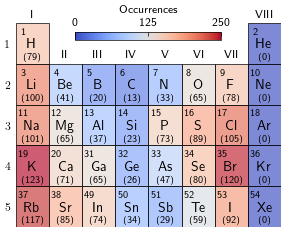

In [4]:
# count how often each element occurs in the test set
test_elems = np.array([])
for test in test_set:
    if test in data_df["mat_id"].values:
        test_elems = np.append(
            test_elems, data_df[data_df["mat_id"] == test].elements.values[0])
elem_counts = np.unique(test_elems, return_counts=True)
max_count = np.max(elem_counts[1])
counts = {}
for key, value in zip(*elem_counts):
    counts[key] = [value, value / max_count]

# define the periodic table data
elements = [
    {"Symbol": "H",  "Name": "Hydrogen",
        "AtomicNumber": 1,  "Group": 1,  "Period": 1},
    {"Symbol": "He", "Name": "Helium",
        "AtomicNumber": 2,  "Group": 8, "Period": 1},
    {"Symbol": "Li", "Name": "Lithium",
        "AtomicNumber": 3,  "Group": 1,  "Period": 2},
    {"Symbol": "Be", "Name": "Beryllium",
        "AtomicNumber": 4,  "Group": 2,  "Period": 2},
    {"Symbol": "B",  "Name": "Boron",
        "AtomicNumber": 5,  "Group": 3, "Period": 2},
    {"Symbol": "C",  "Name": "Carbon",
        "AtomicNumber": 6,  "Group": 4, "Period": 2},
    {"Symbol": "N",  "Name": "Nitrogen",
        "AtomicNumber": 7,  "Group": 5, "Period": 2},
    {"Symbol": "O",  "Name": "Oxygen",
        "AtomicNumber": 8,  "Group": 6, "Period": 2},
    {"Symbol": "F",  "Name": "Fluorine",
        "AtomicNumber": 9,  "Group": 7, "Period": 2},
    {"Symbol": "Ne", "Name": "Neon",
        "AtomicNumber": 10, "Group": 8, "Period": 2},
    {"Symbol": "Na", "Name": "Sodium",
        "AtomicNumber": 11, "Group": 1,  "Period": 3},
    {"Symbol": "Mg", "Name": "Magnesium",
        "AtomicNumber": 12, "Group": 2,  "Period": 3},
    {"Symbol": "Al", "Name": "Aluminum",
        "AtomicNumber": 13, "Group": 3, "Period": 3},
    {"Symbol": "Si", "Name": "Silicon",
        "AtomicNumber": 14, "Group": 4, "Period": 3},
    {"Symbol": "P",  "Name": "Phosphorus",
        "AtomicNumber": 15, "Group": 5, "Period": 3},
    {"Symbol": "S",  "Name": "Sulfur",
        "AtomicNumber": 16, "Group": 6, "Period": 3},
    {"Symbol": "Cl", "Name": "Chlorine",
        "AtomicNumber": 17, "Group": 7, "Period": 3},
    {"Symbol": "Ar", "Name": "Argon",
        "AtomicNumber": 18, "Group": 8, "Period": 3},
    {"Symbol": "K",  "Name": "Potassium",
        "AtomicNumber": 19, "Group": 1,  "Period": 4},
    {"Symbol": "Ca", "Name": "Calcium",
        "AtomicNumber": 20, "Group": 2,  "Period": 4},
    {"Symbol": "Ga", "Name": "Gallium",
        "AtomicNumber": 31, "Group": 3, "Period": 4},
    {"Symbol": "Ge", "Name": "Germanium",
        "AtomicNumber": 32, "Group": 4, "Period": 4},
    {"Symbol": "As", "Name": "Arsenic",
        "AtomicNumber": 33, "Group": 5, "Period": 4},
    {"Symbol": "Se", "Name": "Selenium",
        "AtomicNumber": 34, "Group": 6, "Period": 4},
    {"Symbol": "Br", "Name": "Bromine",
        "AtomicNumber": 35, "Group": 7, "Period": 4},
    {"Symbol": "Kr", "Name": "Krypton",
        "AtomicNumber": 36, "Group": 8, "Period": 4},
    {"Symbol": "Rb", "Name": "Rubidium",
        "AtomicNumber": 37, "Group": 1,  "Period": 5},
    {"Symbol": "Sr", "Name": "Strontium",
        "AtomicNumber": 38, "Group": 2,  "Period": 5},
    {"Symbol": "In", "Name": "Indium",
        "AtomicNumber": 49, "Group": 3, "Period": 5},
    {"Symbol": "Sn", "Name": "Tin",
        "AtomicNumber": 50, "Group": 4, "Period": 5},
    {"Symbol": "Sb", "Name": "Antimony",
        "AtomicNumber": 51, "Group": 5, "Period": 5},
    {"Symbol": "Te", "Name": "Tellurium",
        "AtomicNumber": 52, "Group": 6, "Period": 5},
    {"Symbol": "I",  "Name": "Iodine",
        "AtomicNumber": 53, "Group": 7, "Period": 5},
    {"Symbol": "Xe", "Name": "Xenon",
        "AtomicNumber": 54, "Group": 8, "Period": 5},
]
df = pd.DataFrame(elements)

# create a grid for the periodic table
fig, ax = plt.subplots(figsize=(3, 2.5))

# plot each element
cmap = plt.get_cmap("coolwarm")
for _, element in df.iterrows():
    # adjust for visual positioning in the grid
    xpos = element["Group"]
    ypos = element["Period"]

    # add the element box
    try:
        color = cmap(counts[element["Symbol"]][1], alpha=0.65)
    except:
        color = cmap(0, alpha=0.65)
    ax.add_patch(plt.Rectangle((xpos - 0.5, ypos - 0.5), 1.0,
                 1.0, color=color, ec="black", linewidth=0.5))
    ax.text(xpos, ypos + 0.02, element["Symbol"], ha="center",
            va="center", fontsize=10)
    ax.text(xpos - 0.275, ypos - 0.285,
            element["AtomicNumber"], ha="center", va="center", fontsize=7)
    try:
        ax.text(xpos, ypos + 0.35,
                f"({counts[element['Symbol']][0]})", ha="center", va="center", fontsize=7)
    except:
        ax.text(xpos, ypos + 0.35, "(0)", ha="center", va="center", fontsize=7)

# colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(
    sm,
    ax=ax,
    location="top",
    shrink=0.55,
    pad=-0.075,
    ticks=[0, 0.5, 1],
)
cbar.ax.set_xticklabels(["0", "125", "250"])
cbar.set_label("Occurrences")

# group labels
labels = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII"]
for i in [1, 8]:
    ax.annotate(
        labels[i-1],
        xy=(i, 0.85),
        xycoords=("data", "figure fraction"),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )
for i in range(2, 8):
    ax.annotate(
        labels[i-1],
        xy=(i, 0.69),
        xycoords=("data", "figure fraction"),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# customize the plot
ax.set_xlim(0.5, 8.5)
ax.set_ylim(5.5, 0.5)

# hide gridlines and ticks
ax.grid(False)
ax.tick_params(left=False, bottom=False, labelleft=True,
               labelbottom=False, labeltop=False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)

# make it pretty
plt.tight_layout()

# save the plot
plt.savefig("plots/elem_dist_test.pdf")
plt.savefig("plots/elem_dist_test.svg")